<a href="https://colab.research.google.com/github/shonyeajin/KCBD/blob/main/%EC%BB%A8%EB%B8%8C%EB%84%B7_%EC%82%AC%EC%A0%84%ED%9B%88%EB%A0%A8%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeajinshon","key":"5d9263b1f17cbceaaf414658d4f7f975"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
from IPython.core.display import JSON
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.8MB/s]
 99% 536M/543M [00:04<00:00, 98.8MB/s]
100% 543M/543M [00:04<00:00, 124MB/s] 
 97% 264M/271M [00:03<00:00, 88.9MB/s]
100% 271M/271M [00:03<00:00, 90.6MB/s]


In [5]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [6]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train  train.zip


In [7]:
import os, shutil

original_dataset_dir='./datasets/cats_and_dogs/train'

base_dir='./datasets/cats_and_dogs_small'
os.mkdir(base_dir)

In [8]:
train_dir=os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [9]:
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)


In [10]:
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [12]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src, dst)

In [13]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src, dst)

In [14]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src, dst)

In [15]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [16]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [17]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [18]:
from keras.applications.vgg16 import VGG16

conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


데이터 증식을 사용하지 않는 빠른 특성 추출

In [19]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir='./datasets/cats_and_dogs_small'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir, 'validation')
test_dir=os.path.join(base_dir, 'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
  features=np.zeros(shape=(sample_count, 4,4,512))
  labels=np.zeros(shape=(sample_count))
  generator=datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary'
  )
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch= conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size]= features_batch
    labels[i*batch_size:(i+1)*batch_size]=labels_batch
    i+=1
    if i*batch_size >=sample_count:
      break
  return features, labels

train_features, train_labels=extract_features(train_dir, 2000)
validation_features,validation_labels=extract_features(validation_dir, 1000)
test_features, test_labels=extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
train_features=np.reshape(train_features,(2000, 4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000, 4*4*512))

In [22]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model= models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


history=model.fit(train_features, train_labels,
                  epochs=30, 
                  batch_size=20,
                  validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 2s 8ms/step - loss: 0.5779 - acc: 0.6835 - val_loss: 0.4524 - val_acc: 0.7980
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4129 - acc: 0.8185 - val_loss: 0.3541 - val_acc: 0.8770
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3467 - acc: 0.8530 - val_loss: 0.3255 - val_acc: 0.8780
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3037 - acc: 0.8785 - val_loss: 0.2983 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2804 - acc: 0.8875 - val_loss: 0.2837 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2552 - acc: 0.9030 - val_loss: 0.2728 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2401 - acc: 0.9095 - val_loss: 0.2676 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 1s 7ms/step - loss: 0.

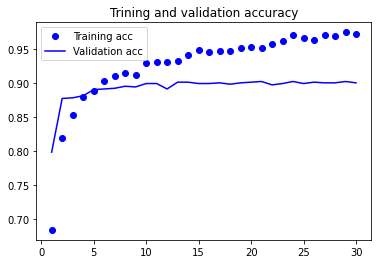

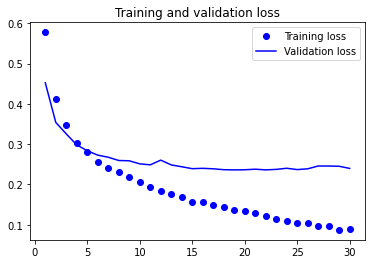

In [24]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trining and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 증식을 사용한 특성 추출(end to end)

In [26]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base.trainable=False

print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결하기 전 훈련되는 가중치의 수: 4


In [30]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 27s - loss: 0.5451 - acc: 0.7370 - val_loss: 0.4023 - val_acc: 0.8500 - 27s/epoch - 269ms/step
Epoch 2/30
100/100 - 27s - loss: 0.4133 - acc: 0.8250 - val_loss: 0.3295 - val_acc: 0.8760 - 27s/epoch - 269ms/step
Epoch 3/30
100/100 - 26s - loss: 0.3572 - acc: 0.8590 - val_loss: 0.2975 - val_acc: 0.8880 - 26s/epoch - 256ms/step
Epoch 4/30
100/100 - 26s - loss: 0.3188 - acc: 0.8675 - val_loss: 0.3157 - val_acc: 0.8560 - 26s/epoch - 256ms/step
Epoch 5/30
100/100 - 26s - loss: 0.3027 - acc: 0.8730 - val_loss: 0.2652 - val_acc: 0.9000 - 26s/epoch - 256ms/step
Epoch 6/30
100/100 - 26s - loss: 0.2831 - acc: 0.8795 - val_loss: 0.2594 - val_acc: 0.8970 - 26s/epoch - 256ms/step
Epoch 7/30
100/100 - 26s - loss: 0.2809 - acc: 0.8840 - val_loss: 0.2554 - val_acc: 0.9030 - 26s/epoch - 256ms/step
Epoch 8/30
100/100 - 26s - loss: 0.2660 - acc: 0.8925 - val_loss: 0.2593 - val_acc: 0.8970 - 26s/epoch - 256ms/step
Epoch 9/30
100/100 - 26s - loss: 0.2505 - acc: 0.8990 - val_loss: 0.2439

In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

block5 전의 층들을 동결하고 ,block_5부터 훈련

In [32]:
#특정 층까지 모든 층 동결하기
conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
100/100 [==============================] - 28s 267ms/step - loss: 0.1730 - acc: 0.9310 - val_loss: 0.2331 - val_acc: 0.9040
Epoch 2/100
100/100 [==============================] - 28s 280ms/step - loss: 0.1773 - acc: 0.9255 - val_loss: 0.2294 - val_acc: 0.9100
Epoch 3/100
100/100 [==============================] - 26s 263ms/step - loss: 0.1815 - acc: 0.9270 - val_loss: 0.2299 - val_acc: 0.9080
Epoch 4/100
100/100 [==============================] - 27s 268ms/step - loss: 0.1712 - acc: 0.9365 - val_loss: 0.2303 - val_acc: 0.9080
Epoch 5/100
100/100 [==============================] - 27s 273ms/step - loss: 0.1695 - acc: 0.9395 - val_loss: 0.2309 - val_acc: 0.9090
Epoch 6/100
100/100 [==============================] - 27s 266ms/step - loss: 0.1708 - acc: 0.9315 - val_loss: 0.2389 - val_acc: 0.9110
Epoch 7/100
100/100 [==============================] - 27s 265ms/step - loss: 0.1703 - acc: 0.9400 - val_loss: 0.2333 - val_acc: 0.9070
Epoch 8/100
100/100 [===========================

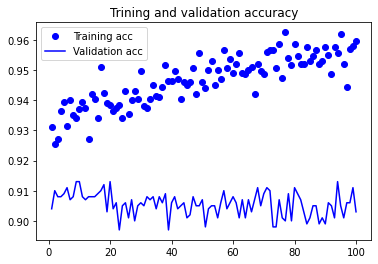

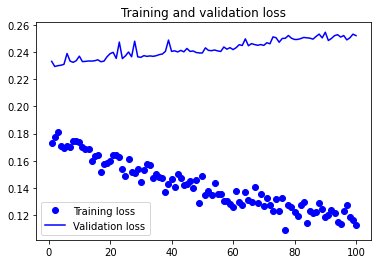

In [34]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trining and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

지수 이동 평균을 이용해서 그래프를 부드럽게 그리기

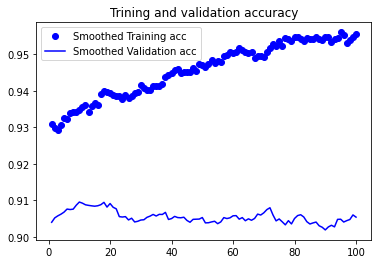

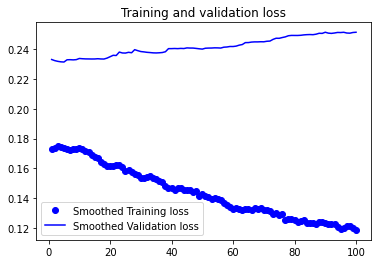

In [36]:
def smooth_curve(points, factor=0.8):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
  
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed Validation acc')
plt.title('Trining and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그래프를 보면 완전 망한것 처럼 보임.<br>
근데 이게 망한게 아니다.<br>
왜냐?!?!?!? 이건 평균을 구해서 그래프를 그린것이니까.<br>
중요한 것은 값의 분포이지 평균이 아님!<br>
따라서 이제 마지막으로 테스트 데이터에서 이 모델을 평가해보겠음<br>

In [38]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
test_loss,test_acc=model.evaluate_generator(test_generator, steps=50)
print('test acc:',test_acc)
print('test loss', test_loss)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.9070000052452087
test loss 0.24934972822666168
